In [57]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [58]:
import cvxpy as cvx

In [59]:
from cvxpy import Variable, Problem, Minimize, norm1, norm2

### L_2 minimization

In [60]:
x=cvx.Variable(2,1,name='x')
constr=[np.matrix([[1,2]])*x==1]
obj=Minimize(norm2(x))

p= Problem(obj,constr)
p.solve()
x.value

matrix([[ 0.2],
        [ 0.4]])

### $L_1$ minimization

In [61]:
constr=[np.matrix([[1,2]])*x==1]
obj=Minimize(cvx.norm1(x))

p= Problem(obj,constr)
p.solve()
x.value

matrix([[  6.20344278e-10],
        [  5.00000000e-01]])

## high dimensions

In [62]:
x=Variable(3,1,name='x')
constr=[np.matrix([[1,2,3]])*x==1]

In [63]:
obj=Minimize(cvx.norm2(x))

p= Problem(obj,constr)
p.solve()
x.value

matrix([[ 0.07142857],
        [ 0.14285714],
        [ 0.21428571]])

In [64]:
obj=Minimize(cvx.norm1(x))
p= Problem(obj,constr)
p.solve()
x.value

matrix([[  3.40265679e-10],
        [  1.04899593e-09],
        [  3.33333333e-01]])

In [65]:
obj.value

0.33333333390983744

## Solve $L_2$ penalized regression

In [66]:
import sympy as S
X = S.Matrix([[1,2,3],
               [3,4,5]])
y = S.Matrix([[1,2]]).T
b0,b1,b2=S.symbols('b:3',real=True)
beta = S.Matrix([[b0,b1,b2]]).T

ns,=X.nullspace()

obj=(X*beta -y).norm(ord=2)**2

sol=S.solve([obj.diff(i) for i in beta])

In [67]:
ns

Matrix([
[ 1],
[-2],
[ 1]])

In [68]:
Xls=X.T*(X*X.T).inv()*y
Xls

Matrix([
[1/6],
[1/6],
[1/6]])

In [69]:
beta.subs(sol).subs(b2,S.Rational(1,6)).norm(2)

sqrt(3)/6

In [70]:
l = S.symbols('l',real=True)
obj=(X*beta-y).norm(2)**2 + beta.norm(2)**2*l

In [71]:
[obj.diff(i) for i in beta]+[obj.diff(l)]

[2*b0*l + 20*b0 + 28*b1 + 36*b2 - 14,
 28*b0 + 2*b1*l + 40*b1 + 52*b2 - 20,
 36*b0 + 52*b1 + 2*b2*l + 68*b2 - 26,
 b0**2 + b1**2 + b2**2]

In [72]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=100.0,fit_intercept=False)
X = np.array(X).astype(float)
y = np.array(y).astype(float)
clf.fit(X,y)
print clf.coef_
print clf.score(X,y)

[[ 0.0428641   0.06113005  0.07939601]]
-2.73741728273


In [73]:
from scipy.optimize import minimize
foo=S.lambdify((b0,b1,b2),obj.subs(l,100))
goo = lambda x:foo(x[0],x[1],x[2])
out=minimize(goo,[.1,.2,.3])
out.x

array([ 0.0428641 ,  0.06113005,  0.079396  ])

In [74]:
import numpy as np
from numpy import cos, pi
np.random.seed(1234567)
xi = np.linspace(0,1,100)[:,None]
xin = np.linspace(0,1,20)[:,None]
xin= np.sort(np.random.choice(xi.flatten(),20,replace=False))[:,None]
f0 = 1 # init frequency
BW = 2
y = cos(2*pi*(f0*xin+(BW/2.0)*xin**2))
yi = cos(2*pi*(f0*xi+(BW/2.0)*xi**2))

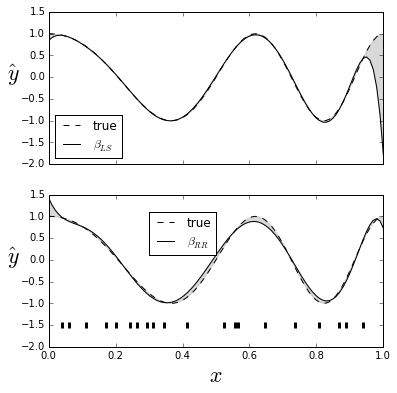

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

qfit = PolynomialFeatures(degree=8) # quadratic
Xq = qfit.fit_transform(xin)
Xiq = qfit.fit_transform(xi)

lr=LinearRegression() # create linear model 
lr.fit(Xq,y)

fig,axs=subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((6,6))
ax=axs[0]
# ax.plot(xin,lr.predict(Xq).flatten())
# ax.plot(xin,y,'-o')
ax.plot(xi,yi,label='true',ls='--',color='k')
ax.plot(xi,lr.predict(Xiq),label=r'$\beta_{LS}$',color='k')
ax.legend(loc=0)
ax.set_ylabel(r'$\hat{y}$  ',fontsize=22,rotation='horizontal')
ax.fill_between(xi.flatten(),yi.flatten(),lr.predict(Xiq).flatten(),color='gray',alpha=.3)


clf = Ridge(alpha=1e-9,fit_intercept=False)
clf.fit(Xq,y)
ax=axs[1]
# ax.plot(xin,clf.predict(Xq).flatten())
# ax.plot(xin,y,'-o')
ax.plot(xi,yi,label=r'true',ls='--',color='k')
ax.plot(xi,clf.predict(Xiq),label=r'$\beta_{RR}$',color='k')
ax.legend(loc=(0.3,0.6))
ax.fill_between(xi.flatten(),yi.flatten(),clf.predict(Xiq).flatten(),color='gray',alpha=.3)

ax.plot(xin, -1.5+np.array([0.01]*len(xin)), '|', color='k',mew=3)
ax.set_xlabel('$x$',fontsize=22)
ax.set_ylabel(r'$\hat{y}$  ',fontsize=22,rotation='horizontal')

## Lasso regression

In [76]:
from sklearn.linear_model import Lasso
X = S.Matrix([[1,2,3],
               [3,4,5]])
y = S.Matrix([[1,2]]).T

In [77]:
clf = Lasso(alpha=1,fit_intercept=False)
X = np.array(X).astype(float)
y = np.array(y).astype(float)
clf.fit(X,y)
print clf.coef_
print clf.score(X,y)

[ 0.          0.          0.32352941]
0.705882352941


In [78]:
obj=1/4.*(X*beta-y).norm(2)**2 + beta.norm(1)*l

In [79]:
foo=S.lambdify((b0,b1,b2),obj.subs(l,1))
goo = lambda x:foo(x[0],x[1],x[2])
out=minimize(goo,[.0,.0,.3])
out.x

array([ 0. ,  0. ,  0.3])

In [80]:
from scipy.optimize import fmin
fmin(goo,[.1,.1,.1])

Optimization terminated successfully.
         Current function value: 0.360294
         Iterations: 116
         Function evaluations: 209


array([  2.80468908e-07,   3.65488573e-07,   3.23618557e-01])

In [81]:
o=[]
scores=[]
alphas= np.logspace(-3,0,10)
for a in alphas:
    clf = Lasso(alpha=a,fit_intercept=False)
    clf.fit(X,y)
    o.append(clf.coef_)
    scores.append(clf.score(X,y))


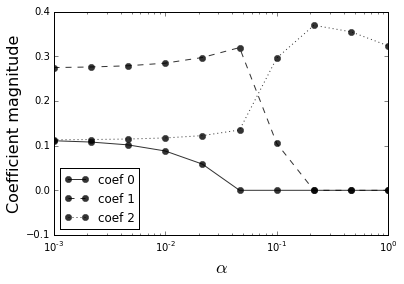

In [85]:
fig,ax=subplots()
k=vstack(o)
ls = ['-','--',':','-.']
for i in range(k.shape[1]):
    ax.semilogx(alphas,k[:,i],'o-',
                label='coef %d'%(i),
                color='k',ls=ls[i],
                alpha=.8,
                )
_=ax.axis(ymin=-1e-1)
_=ax.legend(loc=0)
_=ax.set_xlabel(r'$\alpha$',fontsize=18)
_=ax.set_ylabel(r'Coefficient magnitude',fontsize=16)


In [27]:
import numpy as np
from numpy import cos, pi
np.random.seed(1234567)
xi = np.linspace(0,1,100)[:,None]
xin = np.linspace(0,1,20)[:,None]
xin= np.sort(np.random.choice(xi.flatten(),20,replace=False))[:,None]
f0 = 1 # init frequency
BW = 2
y = cos(2*pi*(f0*xin+(BW/2.0)*xin**2))
yi = cos(2*pi*(f0*xi+(BW/2.0)*xi**2))

D:\Miniconda64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


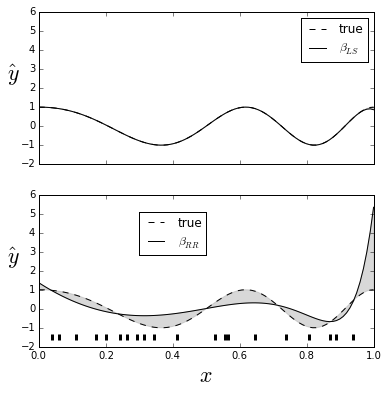

In [28]:
qfit = PolynomialFeatures(degree=15) # quadratic
Xq = qfit.fit_transform(xin)
Xiq = qfit.fit_transform(xi)

lr=LinearRegression() # create linear model 
lr.fit(Xq,y)

fig,axs=subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((6,6))
ax=axs[0]
# ax.plot(xin,lr.predict(Xq).flatten())
# ax.plot(xin,y,'-o')
ax.plot(xi,yi,label='true',ls='--',color='k')
ax.plot(xi,lr.predict(Xiq),label=r'$\beta_{LS}$',color='k')
ax.legend(loc=0)
ax.set_ylabel(r'$\hat{y}$  ',fontsize=22,rotation='horizontal')
ax.fill_between(xi.flatten(),yi.flatten(),lr.predict(Xiq).flatten(),color='gray',alpha=.3)

clf = Lasso(alpha=1e-3,fit_intercept=False)
clf.fit(Xq,y)
ax=axs[1]
# ax.plot(xin,clf.predict(Xq).flatten())
# ax.plot(xin,y,'-o')
ax.plot(xi,yi,label=r'true',ls='--',color='k')
ax.plot(xi,clf.predict(Xiq),label=r'$\beta_{RR}$',color='k')
ax.legend(loc=(0.3,0.6))
ax.fill_between(xi.flatten(),yi.flatten(),clf.predict(Xiq).flatten(),color='gray',alpha=.3)

ax.plot(xin, -1.5+np.array([0.01]*len(xin)), '|', color='k',mew=3)
ax.set_xlabel('$x$',fontsize=22)
ax.set_ylabel(r'$\hat{y}$  ',fontsize=22,rotation='horizontal')